<a href="https://colab.research.google.com/github/Beta628427/Tesis/blob/master/2_Beta___Cod/Beta_PCA/PCA_Cod_master_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CODIGO MASTER PCA _ BETA

## En escodigo encontraremos PCA aplicado a los datos mmc3

__ Versión 1.0 __

In [99]:
pip install mglearn

In [0]:
import gspread
from google.colab import auth
from oauth2client.client import GoogleCredentials
import sklearn
import mglearn
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
# Autoriza Drive_BETA
auth.authenticate_user()
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
#
sh            = gc.open('mmc3')                   # Abro documento 
worksheet     = sh.worksheet("Joint Rotations")   # Entro a la pestaña de Excel
rows          = worksheet.get_all_values()        # Saco todos los valores
df            = pd.DataFrame.from_records(rows)   # Guardo en una tabla panda

In [102]:
pd.DataFrame(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
0,Angle [°],% Gait Cycle,Natural,,,XS,,,S,,,M,,,L,,,Toe,,,Heel,,,Ascending,,,Descending,,,Natural,,,XS,,,S,,,M,,,L,,,Toe,,,Heel,,,Ascending,,,Descending,,
1,Pelvic Ant/Posterior Tilt,0,-7.3,-2.8,1.6,-7.2,-3.7,-0.2,-7.1,-2.6,1.9,-8.2,-3.6,1.0,-9.4,-4.4,0.5,-10.9,-6.5,-2.1,-12.4,-7.9,-3.4,-8.1,-3.3,1.6,-7.0,-2.4,2.2,-16.4,-9.3,-2.3,-15.7,-9.4,-3.1,-16.9,-9.1,-1.2,-14.6,-8.8,-3.0,-17.3,-12.8,-8.3,-19.0,-12.9,-6.7,-21.4,-14.7,-8.0,-18.0,-11.7,-5.4,-15.9,-9.2,-2.5
2,Pelvic Ant/Posterior Tilt,1,-7.2,-2.8,1.6,-7.2,-3.7,-0.3,-7.0,-2.6,1.8,-8.2,-3.6,1.0,-9.2,-4.4,0.5,-10.8,-6.4,-2.1,-12.3,-7.8,-3.3,-8.5,-3.7,1.1,-7.1,-2.6,1.9,-16.4,-9.4,-2.4,-15.9,-9.5,-3.2,-16.9,-9.1,-1.2,-14.7,-8.9,-3.0,-17.3,-12.8,-8.3,-19.0,-12.8,-6.7,-21.3,-14.6,-8.0,-18.3,-12.0,-5.7,-15.9,-9.2,-2.5
3,Pelvic Ant/Posterior Tilt,2,-7.2,-2.8,1.6,-7.2,-3.8,-0.4,-7.0,-2.6,1.8,-8.2,-3.5,1.1,-9.2,-4.3,0.5,-10.6,-6.3,-2.1,-12.2,-7.7,-3.2,-8.9,-4.1,0.6,-7.3,-2.8,1.7,-16.5,-9.5,-2.5,-16.1,-9.7,-3.3,-17.0,-9.2,-1.3,-14.8,-9.0,-3.2,-17.3,-12.9,-8.5,-18.9,-12.8,-6.8,-21.3,-14.7,-8.1,-18.6,-12.3,-6.0,-16.0,-9.3,-2.6
4,Pelvic Ant/Posterior Tilt,3,-7.2,-2.7,1.7,-7.2,-3.8,-0.4,-7.0,-2.6,1.8,-8.1,-3.5,1.2,-9.1,-4.3,0.6,-10.5,-6.3,-2.0,-12.2,-7.7,-3.2,-9.3,-4.6,0.0,-7.4,-2.9,1.6,-16.7,-9.6,-2.6,-16.3,-9.8,-3.4,-17.1,-9.2,-1.4,-15.0,-9.1,-3.3,-17.4,-13.1,-8.8,-18.8,-12.9,-6.9,-21.4,-14.8,-8.3,-19.0,-12.7,-6.4,-16.1,-9.4,-2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1410,Foot Int/External Rotation,96,-21.1,-13.4,-5.7,-18.6,-12.5,-6.3,-22.7,-14.1,-5.4,-19.8,-12.4,-5.0,-20.8,-12.2,-3.5,-13.6,-7.0,-0.4,-22.7,-14.7,-6.8,-21.0,-12.9,-4.8,-24.4,-12.4,-0.5,-19.8,-12.9,-6.0,-18.9,-12.3,-5.6,-20.2,-13.5,-6.9,-19.7,-13.1,-6.5,-17.2,-11.9,-6.5,-9.8,-4.0,1.9,-20.8,-14.7,-8.6,-21.4,-14.4,-7.3,-20.1,-13.2,-6.4
1411,Foot Int/External Rotation,97,-20.7,-13.1,-5.6,-18.5,-12.3,-6.1,-22.3,-13.9,-5.5,-19.4,-12.1,-4.9,-20.2,-11.8,-3.3,-13.5,-6.8,-0.2,-22.6,-14.6,-6.5,-20.1,-11.6,-3.1,-23.9,-11.6,0.6,-19.4,-12.6,-5.8,-18.9,-12.2,-5.4,-19.9,-13.2,-6.5,-19.1,-12.8,-6.4,-16.7,-11.3,-5.8,-9.4,-3.7,2.1,-20.5,-14.5,-8.4,-20.3,-13.2,-6.1,-19.5,-12.7,-5.9
1412,Foot Int/External Rotation,98,-20.1,-12.9,-5.7,-18.3,-12.0,-5.8,-21.6,-13.6,-5.5,-18.9,-11.9,-4.9,-19.6,-11.4,-3.2,-13.6,-6.9,-0.1,-22.4,-14.3,-6.2,-19.4,-10.6,-1.8,-23.5,-11.0,1.6,-19.0,-12.3,-5.6,-18.8,-12.0,-5.2,-19.4,-12.8,-6.2,-18.5,-12.4,-6.2,-16.4,-10.7,-4.9,-9.0,-3.4,2.3,-20.2,-14.1,-8.1,-19.4,-12.2,-5.0,-19.0,-12.2,-5.4
1413,Foot Int/External Rotation,99,-19.4,-12.5,-5.6,-18.0,-11.6,-5.3,-21.0,-13.1,-5.3,-18.3,-11.6,-4.9,-18.9,-11.0,-3.2,-13.9,-7.0,-0.1,-22.2,-14.1,-6.0,-18.9,-9.8,-0.7,-23.3,-10.5,2.3,-18.4,-11.8,-5.3,-18.5,-11.7,-4.9,-18.8,-12.3,-5.8,-17.8,-11.9,-6.0,-16.1,-10.1,-4.1,-8.7,-3.2,2.4,-19.7,-13.8,-7.9,-18.9,-11.5,-4.2,-18.6,-11.9,-5.1


In [103]:
targets                       = df.iloc[0,:]
targets                       = pd.DataFrame(targets[np.newaxis,:])
Pelvic_Ant_Posterior_Tilt     = np.concatenate((np.array(targets),np.array(df.iloc[1:102,:])),axis=0)
# creo X
fila_1 = 1
fila_2 = fila_1 + 101
# concateno de 0-100% con los valores q deseo graficar como coordenadas X
X1 = np.concatenate((np.array(df.iloc[fila_1:fila_2,[1]]),np.array(df.iloc[fila_1:fila_2,[3,6,7,12,15,18,21,24,27]])),   axis=1)
X2 = np.concatenate((np.array(df.iloc[fila_1:fila_2,[1]]),np.array(df.iloc[fila_1:fila_2,[30,33,36,39,42,45,48,51,54]])),axis=1)
pd.DataFrame(X1)
X  = np.concatenate((X1,X2),axis=0)
pd.DataFrame(X)
# creo Y
Y = []
for i in range(X1.shape[0]):
  Y.append(int(0))
for i in range(X2.shape[0]):
  Y.append(int(1))
#
Y = np.array(Y)
print(pd.DataFrame(X))
#
print(type(X))
print(type(Y))


       0     1     2     3     4      5      6      7      8      9
0      0  -2.8  -3.7  -0.2  -3.6   -4.4   -6.5   -7.9   -3.3   -2.4
1      1  -2.8  -3.7  -0.3  -3.6   -4.4   -6.4   -7.8   -3.7   -2.6
2      2  -2.8  -3.8  -0.4  -3.5   -4.3   -6.3   -7.7   -4.1   -2.8
3      3  -2.7  -3.8  -0.4  -3.5   -4.3   -6.3   -7.7   -4.6   -2.9
4      4  -2.7  -3.8  -0.5  -3.4   -4.2   -6.2   -7.6   -5.1   -3.0
..   ...   ...   ...   ...   ...    ...    ...    ...    ...    ...
197   96  -8.5  -8.9  -8.4  -7.9  -11.7  -12.3  -14.4  -13.3   -9.9
198   97  -8.6  -9.0  -8.5  -7.9  -11.7  -12.3  -14.4  -13.1   -9.9
199   98  -8.7  -9.1  -8.5  -8.0  -11.7  -12.3  -14.3  -12.8   -9.9
200   99  -8.7  -9.1  -8.6  -8.0  -11.7  -12.3  -14.3  -12.6  -10.0
201  100  -8.8  -9.2  -8.6  -8.0  -11.6  -12.3  -14.2  -12.3  -10.0

[202 rows x 10 columns]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
X = np.array(X)
Y = Y[:, np.newaxis]

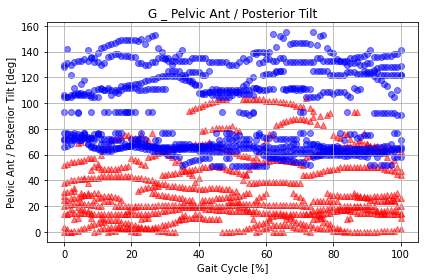

In [105]:
plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], color='red',  marker='^', alpha=0.5) # jovenes
plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 2], color='red',  marker='^', alpha=0.5) # jovenes
plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 3], color='red',  marker='^', alpha=0.5) # jovenes
plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 4], color='red',  marker='^', alpha=0.5) # jovenes
plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 5], color='red',  marker='^', alpha=0.5) # jovenes
plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 6], color='red',  marker='^', alpha=0.5) # jovenes
plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 7], color='red',  marker='^', alpha=0.5) # jovenes
plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 8], color='red',  marker='^', alpha=0.5) # jovenes
plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 9], color='red',  marker='^', alpha=0.5) # jovenes

plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], color='blue', marker='o', alpha=0.5) # viejos
plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 2], color='blue', marker='o', alpha=0.5) # viejos
plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 3], color='blue', marker='o', alpha=0.5) # viejos
plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 4], color='blue', marker='o', alpha=0.5) # viejos
plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 5], color='blue', marker='o', alpha=0.5) # viejos
plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 6], color='blue', marker='o', alpha=0.5) # viejos
plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 7], color='blue', marker='o', alpha=0.5) # viejos
plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 8], color='blue', marker='o', alpha=0.5) # viejos
plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 9], color='blue', marker='o', alpha=0.5) # viejos

plt.grid(True)
plt.title("G _ Pelvic Ant / Posterior Tilt")
plt.xlabel("Gait Cycle [%]")
plt.ylabel("Pelvic Ant / Posterior Tilt [deg]")
plt.yscale('linear')
plt.xscale('linear')
plt.tight_layout()
plt.show()

In [0]:
from sklearn.decomposition import PCA
#
pca=PCA(n_components=2)
pca.fit(X)
#
transformada=pca.transform(X)

In [107]:
transformada.shape

(202, 2)

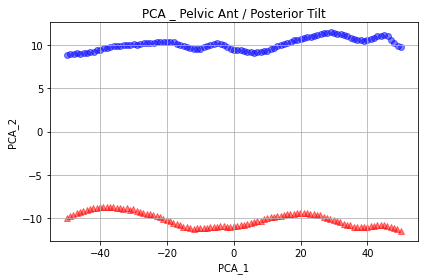

In [108]:
plt.scatter(transformada[Y[:,0] == 0,0],transformada[Y[:,0] == 0,1], color='red',  marker='^', alpha=0.5) 
plt.scatter(transformada[Y[:,0] == 1,0],transformada[Y[:,0] == 1,1], color='blue', marker='o', alpha=0.5) 
plt.grid(True)
plt.title("PCA _ Pelvic Ant / Posterior Tilt")
plt.xlabel("PCA_1")
plt.ylabel("PCA_2")
plt.yscale('linear')
plt.xscale('linear')
plt.tight_layout()
plt.show()

In [0]:
# Re-defino X,Y
X = transformada
Y = Y

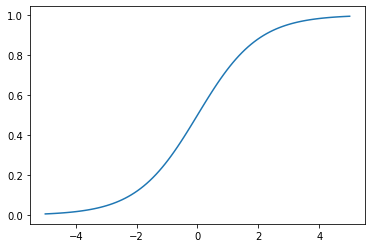

In [110]:
# ==============================================================================
# RED NEURONAL <<<<< NO MODIFICAR >>>>>
# ==============================================================================
# Clase de capa de red
class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):
    self.act_f = act_f
    self.b = np.random.rand(1, n_neur)      * 2 - 1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1
# ==============================================================================
# Funciones de activación
# Sigmoido
sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))
# Relu
relu = lambda x: np.maximum(0, x)
_x = np.linspace(-5, 5, 100)
plt.plot(_x, sigm[0](_x))
# ==============================================================================
# creamos red neurnal
def create_nn(topology, act_f):
  nn = []
  for l, layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l], topology[l+1], act_f))
  return nn
# ==============================================================================
topology = [2,8,16,8,4,1]
neural_net = create_nn(topology, sigm)  
l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))
def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
  out = [(None, X)]
  # Forward pass
  for l, layer in enumerate(neural_net):
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act_f[0](z)
    out.append((z, a))
  if train:
    # Backward pass
    deltas = []
    for l in reversed(range(0, len(neural_net))):
      z = out[l+1][0]
      a = out[l+1][1]
      if l == len(neural_net) - 1:
        # calculamos delta de ultima capa
        # formula de delta0
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
      else:
        # calcular delta respecto a capa previa
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
      _W = neural_net[l].W
      # Gradient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, 
                                                  keepdims=True) * lr   
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
  return out[-1][1]
train(neural_net, X, Y, l2_cost, 0.5)
print("")

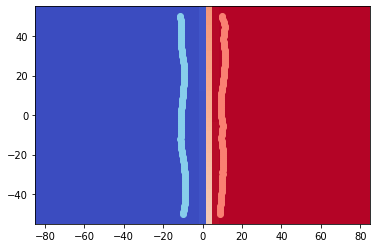

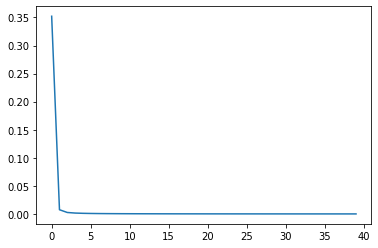

In [114]:
# Modificar TOPOLOGIA
topology = [2,2,1]
neural_n = create_nn(topology, sigm)
loss = []
for i in range(1000): # n iteraciones
  # Entrenemos a la red!
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)
  if i % 25 == 0:
    #print(pY)
    loss.append(l2_cost[0](pY, Y))
    res = 50
    _x0 = np.linspace(-85, 85, res)
    _x1 = np.linspace(-55, 55, res)
    _Y = np.zeros((res, res))
    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]    
    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")
    plt.scatter(X[Y[:, 0] == 0, 1], X[Y[:, 0] == 0, 0], c="skyblue")
    plt.scatter(X[Y[:, 0] == 1, 1], X[Y[:, 0] == 1, 0], c="salmon")
    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5) 
    print("")